In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

## Load data

In [35]:
mdb_data = pd.read_csv("./dataset/mdb_prices.csv")

In [36]:
mdb_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-12-03 00:00:00-05:00,267.850006,278.429993,267.640015,272.010010,582100,0.0,0.0
1,2020-12-04 00:00:00-05:00,274.559998,278.000000,271.170013,277.630005,604600,0.0,0.0
2,2020-12-07 00:00:00-05:00,281.000000,287.959991,275.549988,280.459991,761800,0.0,0.0
3,2020-12-08 00:00:00-05:00,281.707001,287.450012,278.329987,282.980011,1272000,0.0,0.0
4,2020-12-09 00:00:00-05:00,280.100006,305.700012,274.950012,280.010010,2742400,0.0,0.0
...,...,...,...,...,...,...,...,...
1251,2025-11-26 00:00:00-05:00,331.279999,331.799988,325.000000,326.269989,1420800,0.0,0.0
1252,2025-11-28 00:00:00-05:00,330.505005,336.239990,330.505005,332.369995,1199600,0.0,0.0
1253,2025-12-01 00:00:00-05:00,326.429993,335.920013,321.259003,328.869995,4997600,0.0,0.0
1254,2025-12-02 00:00:00-05:00,406.820007,419.500000,399.510010,401.989990,9476700,0.0,0.0


In [37]:
mdb_data['Dividends'].unique()
mdb_data['Stock Splits'].unique()
mdb = mdb_data.drop(['Dividends', 'Stock Splits'], axis=1)

In [38]:
mdb['Log Returns'] = np.log(mdb['Close'] / mdb['Close'].shift(1))

In [39]:
# Garman-Klass volatility estimator
mdb['Intraday Volatility'] = 0.5 * (np.log(mdb['High'] / mdb['Low']) ** 2) - 0.386 * (np.log(mdb['Close'] / mdb['Open']) ** 2)

In [40]:
mdb['Range'] = mdb['High'] - mdb['Low']

In [41]:
mdb

,Date,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range
0,2020-12-03 00:00:00-05:00,267.850006,278.429993,267.640015,272.010010,582100,NaN,0.000689,10.789978
1,2020-12-04 00:00:00-05:00,274.559998,278.000000,271.170013,277.630005,604600,0.020450,0.000262,6.829987
2,2020-12-07 00:00:00-05:00,281.000000,287.959991,275.549988,280.459991,761800,0.010142,0.000969,12.410004
3,2020-12-08 00:00:00-05:00,281.707001,287.450012,278.329987,282.980011,1272000,0.008945,0.000512,9.120026
4,2020-12-09 00:00:00-05:00,280.100006,305.700012,274.950012,280.010010,2742400,-0.010551,0.005620,30.750000
...,...,...,...,...,...,...,...,...,...
1251,2025-11-26 00:00:00-05:00,331.279999,331.799988,325.000000,326.269989,1420800,-0.016656,0.000125,6.799988
1252,2025-11-28 00:00:00-05:00,330.505005,336.239990,330.505005,332.369995,1199600,0.018524,0.000136,5.734985
1253,2025-12-01 00:00:00-05:00,326.429993,335.920013,321.259003,328.869995,4997600,-0.010586,0.000974,14.661011
1254,2025-12-02 00:00:00-05:00,406.820007,419.500000,399.510010,401.989990,9476700,0.200765,0.001137,19.989990


<Axes: title={'center': 'Log Returns over 5 years for $MDB'}, xlabel='Date'>

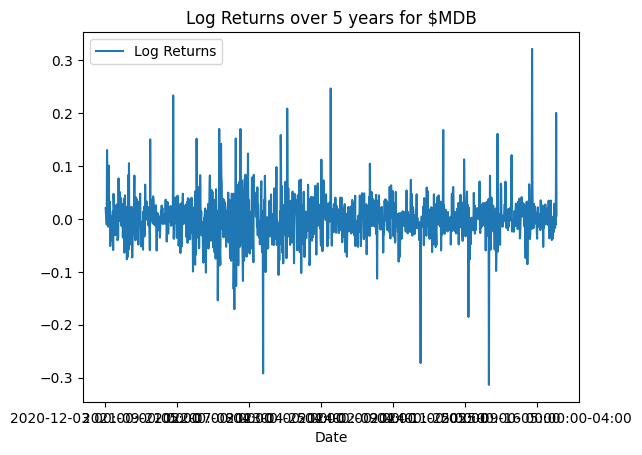

In [42]:
mdb.plot(x='Date', y=['Log Returns'], kind='line', title='Log Returns over 5 years for $MDB')

In [43]:
# EMA
# 10-day EMA
mdb['EMA-10day'] = mdb['Close'].ewm(span=10, adjust=False).mean()

In [52]:
mdb

,datestr,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range,EMA-10day,Date
0,2020-12-03 00:00:00-05:00,267.850006,278.429993,267.640015,272.010010,582100,NaN,0.000689,10.789978,272.010010,2020-12-03
1,2020-12-04 00:00:00-05:00,274.559998,278.000000,271.170013,277.630005,604600,0.020450,0.000262,6.829987,273.031827,2020-12-04
2,2020-12-07 00:00:00-05:00,281.000000,287.959991,275.549988,280.459991,761800,0.010142,0.000969,12.410004,274.382402,2020-12-07
3,2020-12-08 00:00:00-05:00,281.707001,287.450012,278.329987,282.980011,1272000,0.008945,0.000512,9.120026,275.945604,2020-12-08
4,2020-12-09 00:00:00-05:00,280.100006,305.700012,274.950012,280.010010,2742400,-0.010551,0.005620,30.750000,276.684587,2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...
1251,2025-11-26 00:00:00-05:00,331.279999,331.799988,325.000000,326.269989,1420800,-0.016656,0.000125,6.799988,335.458495,2025-11-26
1252,2025-11-28 00:00:00-05:00,330.505005,336.239990,330.505005,332.369995,1199600,0.018524,0.000136,5.734985,334.896950,2025-11-28
1253,2025-12-01 00:00:00-05:00,326.429993,335.920013,321.259003,328.869995,4997600,-0.010586,0.000974,14.661011,333.801140,2025-12-01
1254,2025-12-02 00:00:00-05:00,406.820007,419.500000,399.510010,401.989990,9476700,0.200765,0.001137,19.989990,346.199113,2025-12-02


In [ ]:
mdb = mdb.rename(columns={'Date': 'datestr'})

In [51]:
mdb['Date'] = mdb['datestr'].str.split().str[0]

In [53]:
mdb['Date'] = pd.to_datetime(mdb['Date'])
mdb

,datestr,Open,High,Low,Close,Volume,Log Returns,Intraday Volatility,Range,EMA-10day,Date
0,2020-12-03 00:00:00-05:00,267.850006,278.429993,267.640015,272.010010,582100,NaN,0.000689,10.789978,272.010010,2020-12-03
1,2020-12-04 00:00:00-05:00,274.559998,278.000000,271.170013,277.630005,604600,0.020450,0.000262,6.829987,273.031827,2020-12-04
2,2020-12-07 00:00:00-05:00,281.000000,287.959991,275.549988,280.459991,761800,0.010142,0.000969,12.410004,274.382402,2020-12-07
3,2020-12-08 00:00:00-05:00,281.707001,287.450012,278.329987,282.980011,1272000,0.008945,0.000512,9.120026,275.945604,2020-12-08
4,2020-12-09 00:00:00-05:00,280.100006,305.700012,274.950012,280.010010,2742400,-0.010551,0.005620,30.750000,276.684587,2020-12-09
...,...,...,...,...,...,...,...,...,...,...,...
1251,2025-11-26 00:00:00-05:00,331.279999,331.799988,325.000000,326.269989,1420800,-0.016656,0.000125,6.799988,335.458495,2025-11-26
1252,2025-11-28 00:00:00-05:00,330.505005,336.239990,330.505005,332.369995,1199600,0.018524,0.000136,5.734985,334.896950,2025-11-28
1253,2025-12-01 00:00:00-05:00,326.429993,335.920013,321.259003,328.869995,4997600,-0.010586,0.000974,14.661011,333.801140,2025-12-01
1254,2025-12-02 00:00:00-05:00,406.820007,419.500000,399.510010,401.989990,9476700,0.200765,0.001137,19.989990,346.199113,2025-12-02


In [54]:
mdb['Date'].dtype

dtype('<M8[ns]')

In [55]:
today = pd.Timestamp.today()
today

Timestamp('2025-12-03 20:13:53.095115')

In [56]:
start_date = today - pd.Timedelta(days=30)
start_date

Timestamp('2025-11-03 20:13:53.095115')

<Axes: title={'center': 'Close & 10-day EMA for $MDB'}, xlabel='Date'>

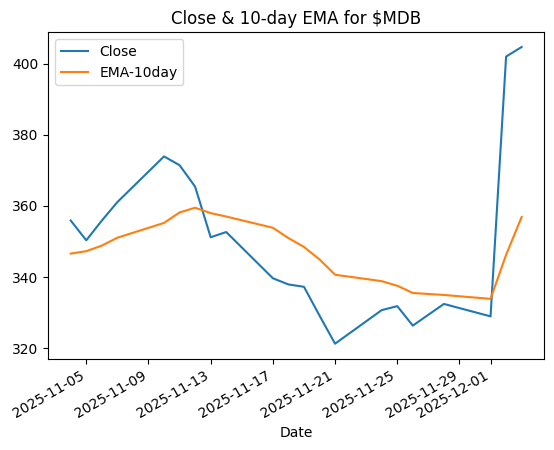

In [57]:
last_30_days_mdb = mdb[mdb['Date'] >= start_date]
last_30_days_mdb.plot(x='Date', y=['Close', 'EMA-10day'], kind='line', title='Close & 10-day EMA for $MDB')

In [62]:
data = mdb[['Date', 'Log Returns', 'Intraday Volatility', 'Range']]

In [74]:
data.shape

(1256, 4)

In [75]:
data.set_index('Date', inplace=True)

In [77]:
data

,Log Returns,Intraday Volatility,Range
Date,,,
2020-12-03,NaN,0.000689,10.789978
2020-12-04,0.020450,0.000262,6.829987
2020-12-07,0.010142,0.000969,12.410004
2020-12-08,0.008945,0.000512,9.120026
2020-12-09,-0.010551,0.005620,30.750000
...,...,...,...
2025-11-26,-0.016656,0.000125,6.799988
2025-11-28,0.018524,0.000136,5.734985
2025-12-01,-0.010586,0.000974,14.661011


In [ ]:
states = ['bull', 'bear', 'rebound']

"""
States:
    bull: low-vol, positive mean
    bear: high-vol, negative mean
    rebound: high-vol, positive mean
"""

## Feature Engineering

## HMM Prelim

In [68]:
def logsumexp(log_vals, axis=None):
    """
    Stable log-sum-exp: log(sum(exp(log_vals))) along given axis.
    """
    m = np.max(log_vals, axis=axis, keepdims=True)
    return m + np.log(np.sum(np.exp(log_vals - m), axis=axis, keepdims=True))


In [65]:
def gaussian_logpdf(x, mean, cov):
    """
    x: (T, D)
    mean: (D,)
    cov: (D, D) positive definite
    Returns: log p(x_t | state) for each t, shape (T,)
    """
    x = np.atleast_2d(x)
    D = x.shape[1]
    mean = mean.reshape(1, D)
    cov = np.atleast_2d(cov)
    
    # Precompute
    inv_cov = np.linalg.inv(cov)
    sign, logdet = np.linalg.slogdet(cov)
    if sign <= 0:
        raise ValueError("Covariance not positive definite")

    diff = x - mean
    # Mahalanobis term
    mah = np.sum(diff @ inv_cov * diff, axis=1)  # shape (T,)
    
    return -0.5 * (D * np.log(2 * np.pi) + logdet + mah)


In [66]:
def forward_backward_log(X, pi, A, means, covs):
    """
    X: (T, D)
    pi: (K,)
    A: (K, K)
    means: (K, D)
    covs:  (K, D, D)
    
    Returns:
        log_alpha: (T, K)
        log_beta:  (T, K)
        log_lik:   scalar log-likelihood
    """
    T, D = X.shape
    K = pi.shape[0]
    
    # Precompute emission log-likelihoods: log B_t(k) = log p(x_t | state=k)
    log_B = np.zeros((T, K))
    for k in range(K):
        log_B[:, k] = gaussian_logpdf(X, means[k], covs[k])
    
    log_pi = np.log(pi)
    log_A = np.log(A)
    
    # Forward pass: log_alpha
    log_alpha = np.zeros((T, K))
    log_alpha[0] = log_pi + log_B[0]
    
    for t in range(1, T):
        # log_alpha[t, j] = log( sum_i exp(log_alpha[t-1, i] + log_A[i, j]) ) + log_B[t, j]
        trans = log_alpha[t-1][:, None] + log_A  # shape (K, K)
        log_alpha[t] = logsumexp(trans, axis=0).ravel() + log_B[t]
    
    # Backward pass: log_beta
    log_beta = np.zeros((T, K))
    log_beta[-1] = 0.0  # log(1)
    
    for t in range(T-2, -1, -1):
        # log_beta[t, i] = log( sum_j A[i,j] * B_{t+1}(j) * beta_{t+1}(j) )
        trans = log_A + (log_B[t+1] + log_beta[t+1])[None, :]  # shape (K, K)
        log_beta[t] = logsumexp(trans, axis=1).ravel()
    
    # Total log-likelihood: log p(X) = logsumexp(log_alpha[T-1])
    log_lik = logsumexp(log_alpha[-1], axis=0).item()
    
    return log_alpha, log_beta, log_lik, log_B


In [69]:
def e_step(X, pi, A, means, covs):
    """
    Runs forward-backward and computes:
      gamma_t(k) = P(Z_t = k | X)
      xi_t(i,j)  = P(Z_t = i, Z_{t+1} = j | X)
    """
    T, D = X.shape
    K = pi.shape[0]
    
    log_alpha, log_beta, log_lik, log_B = forward_backward_log(X, pi, A, means, covs)
    
    # gamma: (T, K)
    log_gamma = log_alpha + log_beta  # unnormalized
    log_gamma = log_gamma - logsumexp(log_gamma, axis=1)  # normalize per t
    gamma = np.exp(log_gamma)
    
    # xi: (T-1, K, K)
    log_A = np.log(A)
    log_xi = np.zeros((T-1, K, K))
    for t in range(T-1):
        # log xi_t(i,j) ∝ log_alpha[t,i] + log_A[i,j] + log_B[t+1,j] + log_beta[t+1,j]
        log_unnorm = (
            log_alpha[t][:, None]
            + log_A
            + (log_B[t+1] + log_beta[t+1])[None, :]
        )  # (K, K)
        log_xi[t] = log_unnorm - logsumexp(log_unnorm)  # normalize
    xi = np.exp(log_xi)
    
    return gamma, xi, log_lik


In [70]:
def m_step(X, gamma, xi):
    """
    X: (T, D)
    gamma: (T, K)
    xi: (T-1, K, K)
    """
    T, D = X.shape
    Tm1 = T - 1
    K = gamma.shape[1]
    
    # Initial state distribution
    pi_new = gamma[0]  # shape (K,)
    
    # Transition matrix
    xi_sum = xi.sum(axis=0)          # (K, K)
    gamma_sum = gamma[:-1].sum(axis=0)  # (K,)
    A_new = xi_sum / gamma_sum[:, None]
    
    # Means and covariances
    means_new = np.zeros((K, D))
    covs_new = np.zeros((K, D, D))
    
    for k in range(K):
        # Weighted mean
        w = gamma[:, k][:, None]  # (T,1)
        denom = w.sum()
        means_new[k] = (w * X).sum(axis=0) / denom
        
        # Weighted covariance
        diff = X - means_new[k]
        cov = (w * diff).T @ diff / denom
        # Regularize slightly in case of numerical issues
        cov += 1e-6 * np.eye(D)
        covs_new[k] = cov
    
    return pi_new, A_new, means_new, covs_new


In [71]:
def fit_hmm(X, K=2, max_iter=100, tol=1e-4, random_state=0):
    """
    Fit a K-state Gaussian HMM to data X using EM.
    
    X: (T, D)
    Returns:
      pi, A, means, covs, log_liks
    """
    rng = np.random.default_rng(random_state)
    T, D = X.shape
    
    # --- Initialization ---
    # Randomly assign states and estimate initial means/covs roughly
    # or use k-means if you want nicer init.
    gamma_init = rng.random((T, K))
    gamma_init /= gamma_init.sum(axis=1, keepdims=True)
    
    pi = gamma_init[0]
    pi /= pi.sum()
    
    # Uniform transition matrix to start
    A = np.ones((K, K)) / K
    
    # Means: pick random rows of X
    means = X[rng.choice(T, size=K, replace=False)]
    
    # Covs: start as global covariance
    global_cov = np.cov(X.T) if D > 1 else np.array([[np.var(X)]])
    covs = np.array([global_cov.copy() for _ in range(K)])
    
    log_liks = []
    prev_log_lik = -np.inf
    
    for it in range(max_iter):
        # E-step
        gamma, xi, log_lik = e_step(X, pi, A, means, covs)
        log_liks.append(log_lik)
        
        # M-step
        pi, A, means, covs = m_step(X, gamma, xi)
        
        # Convergence check
        if it > 0 and abs(log_lik - prev_log_lik) < tol:
            print(f"Converged at iteration {it}, log-lik = {log_lik:.3f}")
            break
        
        prev_log_lik = log_lik
    
    return pi, A, means, covs, np.array(log_liks)


In [72]:
def viterbi(X, pi, A, means, covs):
    T, D = X.shape
    K = pi.shape[0]
    
    log_pi = np.log(pi)
    log_A = np.log(A)
    
    # Emission log-likelihoods
    log_B = np.zeros((T, K))
    for k in range(K):
        log_B[:, k] = gaussian_logpdf(X, means[k], covs[k])
    
    # DP arrays
    delta = np.zeros((T, K))  # best log-prob up to t, ending in k
    psi = np.zeros((T, K), dtype=int)  # argmax pointers
    
    delta[0] = log_pi + log_B[0]
    
    for t in range(1, T):
        for j in range(K):
            scores = delta[t-1] + log_A[:, j]
            psi[t, j] = np.argmax(scores)
            delta[t, j] = scores[psi[t, j]] + log_B[t, j]
    
    # Backtrack
    states = np.zeros(T, dtype=int)
    states[-1] = np.argmax(delta[-1])
    for t in range(T-2, -1, -1):
        states[t] = psi[t+1, states[t+1]]
    
    return states


### Looking at results

In [81]:
# Keep only the rows where all 3 features are non-missing
X = data[['Log Returns', 'Intraday Volatility', 'Range']].dropna().values  # shape (T, 3)

# If you also want to keep the aligned dates:
aligned_dates = data[['Log Returns', 'Intraday Volatility', 'Range']].dropna().index


In [84]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0, ddof=1)
X_stdized = (X - X_mean) / X_std

In [88]:
K = 2  # or 3 if you want a 3-regime model

pi, A, means, covs, log_liks = fit_hmm(X_stdized, K=K, max_iter=100, tol=1e-4, random_state=0)

print("Initial state probabilities (pi):")
print(pi)
print("\nTransition matrix (A):")
print(A)
print("\nState means (in standardized units):")
print(means)
print("\nFinal log-likelihood:", log_liks[-1])


Converged at iteration 26, log-lik = -3632.435
Initial state probabilities (pi):
[1.00641276e-61 1.00000000e+00]

Transition matrix (A):
[[0.72503327 0.27496673]
 [0.14535331 0.85464669]]

State means (in standardized units):
[[-0.06526087  0.84811432  0.87800107]
 [ 0.034445   -0.44763876 -0.46341313]]

Final log-likelihood: -3632.4353530360927


In [89]:
# Convert means from standardized back to original scale
means_original = means * X_std + X_mean
print("State means in original feature units:")
print(means_original)


State means in original feature units:
[[-2.50745362e-03  1.98603398e-03  2.19681530e+01]
 [ 1.80710246e-03  5.25576002e-04  1.09935256e+01]]


In [90]:
states = viterbi(X_stdized, pi, A, means, covs)  # shape (T,)

# Attach regimes back to your dates
regime_series = np.zeros(len(data)) * np.nan
regime_series[:len(aligned_dates)] = np.nan  # we'll align properly below

# Easier: create a pandas Series directly
regimes = pd.Series(states, index=aligned_dates, name='Regime')

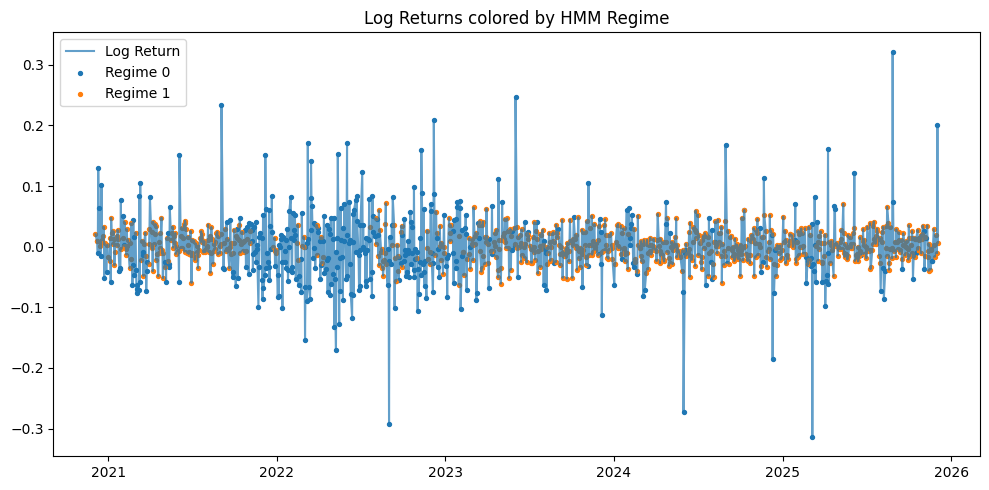

In [91]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(aligned_dates, data.loc[aligned_dates, 'Log Returns'], label='Log Return', alpha=0.7)

# Color background by regime
for k in range(K):
    mask = (regimes == k)
    ax.scatter(aligned_dates[mask], data.loc[aligned_dates[mask], 'Log Returns'],
               s=8, label=f'Regime {k}')

ax.legend()
ax.set_title('Log Returns colored by HMM Regime')
plt.tight_layout()
plt.show()


#### Univariate

In [92]:
X1 = data['Log Returns'].dropna().values.reshape(-1, 1)
aligned_dates1 = data['Log Returns'].dropna().index

pi, A, means, covs, log_liks = fit_hmm(X1, K=2, max_iter=100, tol=1e-4, random_state=0)
states1 = viterbi(X1, pi, A, means, covs)
regimes1 = pd.Series(states1, index=aligned_dates1, name='Regime')


Converged at iteration 56, log-lik = 2353.404


In [ ]:
# X_log_ret: shape (T,)  or (T,1)
# vol, rng: shape (T,)   (intraday volatility, range)

# If you want **univariate** HMM with log returns:
X = X_log_ret.reshape(-1, 1)

# If you want **multivariate** HMM with 3 features:
X = np.column_stack([X_log_ret, intraday_vol, daily_range])


In [ ]:
K = 2  # or 3
pi, A, means, covs, log_liks = fit_hmm(X, K=K, max_iter=100, tol=1e-4)

states = viterbi(X, pi, A, means, covs)
